<a href="https://colab.research.google.com/github/Tizzy1999/ml2019/blob/master/knn_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [251]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#**Diabetes Dataset**

In [0]:
url = "/content/gdrive/My Drive/201911ML/diabetes.csv"
diabetes = pd.read_csv(url)

In [254]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [255]:
print("dimension of diabetes data: {}".format(diabetes.shape))

dimension of diabetes data: (768, 9)


**Exploring Data**

In [256]:
# “Outcome” is the feature we are going to predict, 
# 0 means No diabetes, 1 means diabetes. 
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


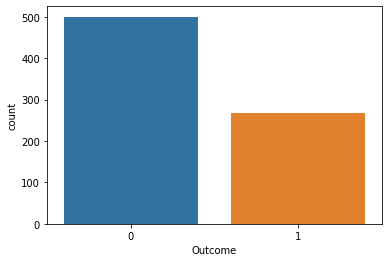

In [257]:
import seaborn as sns
sns.countplot(diabetes['Outcome'], label="Count")

In [258]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [259]:
X = diabetes.drop(columns=['Outcome'])
X0 = X
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [260]:
y = diabetes['Outcome'].values
y[0:5]

array([1, 0, 1, 0, 1])

#**Spliting Dataset**

In [0]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
#  Setting ‘random_state’ to 1 ensures that we get the same split each time so we can reproduce our results.
#  Setting ‘stratify’ to y makes our training split represent the proportion of each value in the y variable. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=1, stratify=y)


# **Building KNN Model**

In [262]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5)
# Fit the classifier to the data
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [263]:
knn.score(X_test, y_test)

0.7012987012987013

# **Cross Validation**

Cross-validation is when the dataset is randomly split up into ‘k’ groups. One of the groups is used as the test set and the rest are used as the training set. 

For example, for 5-fold cross validation, the dataset would be split into 5 groups, and the model would be trained and tested 5 separate times so each group would get a chance to be the test set. This can be seen in the graph below.

![alt text](https://miro.medium.com/max/2220/1*NyvaFiG_jXcGgOaouumYJQ.jpeg)

In [264]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model

knn_cv = KNeighborsClassifier(n_neighbors=5)
#train model with cv of 5 

cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print(np.mean(cv_scores))
#Using cross-validation, our mean score is about 72.40%. 
#This is a more accurate representation of how our model will perform on unseen data 
#than our earlier testing using the holdout method.


[0.72727273 0.72727273 0.7012987  0.75816993 0.70588235]
0.723979288685171


# **Hypertuning model parameters using GridSearchCV**

GridSearchCV works by training our model multiple times on a range of parameters that we specify. That way, we can test our model with each parameter and figure out the optimal values to get the best accuracy results

In [265]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X0, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [266]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 14}

In [267]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.7578125